# Homework of Finite Difference Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

## HW_01

**Lemma 5.2** (Spectral norm inequality). 

*Let $A > cI$, $c > 0$. Then the spectral norm
$|A^{−1}| < c^{−1}$.*

### 证明

我们给出不同于论文上的一个几何证明

我们先明确**谱范数**是什么

$|A|=\max_{|x|=1}{|Ax|}$

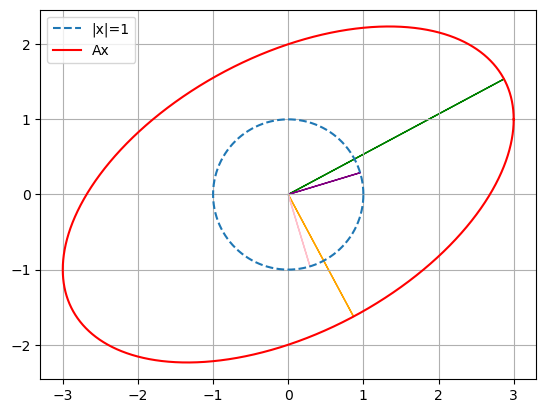

In [18]:
A = np.array([
    [3, 0],
    [1, 2],
])

t = np.linspace(0, 2*np.pi, 10000)
x = np.array([
    np.cos(t), np.sin(t)
])
plt.plot(x[0], x[1], '--')
y = A @ x
plt.plot(y[0], y[1], 'r')

l = np.sqrt(y[0]**2+y[1]**2)
i, s = np.argmin(l), np.argmax(l)
ui, us = y[:,i], y[:,s]
plt.arrow(0, 0, ui[0], ui[1], color='orange')
plt.arrow(0, 0, us[0], us[1], color='green')

vi, vs = x[:,i], x[:,s]
plt.arrow(0, 0, vi[0], vi[1], color='pink')
plt.arrow(0, 0, vs[0], vs[1], color='purple')


plt.axis("equal")
plt.grid()
plt.legend(['|x|=1', 'Ax'])

### 奇异值分解

$x^Tx=1, |Ax|$ 的极值点也就是 $|Ax|^2=x^TA^TAx$ 的极值点

那么，由Lagrange乘数法定理，极值点满足，存在一个$\lambda$使得
$$ \dfrac{\partial}{\partial{x}}(x^TA^TAx-\lambda x^Tx)=0 $$

根据矩阵微分法则
$$ LHS=2(A^TAx-\lambda x) $$
因此，$x$ 是对称矩阵 $A^TA$ 的特征向量，我们选择$n$个单位正交的列向量组成 $V=(v_i)_{i\le n}$
我们有
$$ \langle Av_i,Av_j\rangle=v_i^TA^TAv_j = \lambda_jv_i^Tv_j = 0 $$
故 $AV$ 的列正交，将其单位化我们有
$$ AV=U\Sigma $$
其中$\Sigma$是正的对角矩阵，$U$是单位正交方阵，即
$$A=U\Sigma V^T$$
由于 $|Av_j|^2=v_j^TA^TAv_j = \lambda_j $,
故 $\sigma_j=\sqrt{\lambda_j}$

以上，我们重新发现一遍矩阵的**奇异值分解**，并且我们已经清楚
$$|A|=\max{\sigma_i}$$
那么我们立刻得到
$$ |A^{-1}|=|V\Sigma^{-1}U^T|=\max \sigma_i^{-1} $$

### 命题证明

我们现在来考虑给出的条件 $A>cI$，即对于任意 $x^Tx=1$，有
$$x^TAx>c$$
这意味着，
$$c<\langle x,Ax\rangle=\langle x,U\Sigma V^Tx\rangle $$
令 $y=V^Tx$，则有
$$ c<\langle Vy,U\Sigma y\rangle, \forall |y|=1 $$
我们令 $y=e_j$，则有
$$ c<\langle v_j, \sigma_j u_j\rangle <\sigma_j $$
故 $\sigma^{-1} <c^{-1} $，则
$$ |A^{-1}|=\max \sigma_i^{-1}<c^{-1} $$


### 小结

事实上，从几何角度观察与代数证明相互印证，我们想要证明
$$ |A|=\max \sigma_i=\sqrt{\rho(A^TA)}>c $$
就是要证明 $A^TA>c^2I$
那么余下的代数技巧就是显而易见，且恰好符合条件的

## HW_02

用 $\delta$ 函数法求四阶导算子矩阵$A$（大小$(N+4)\times(N+4)$）的逆
$$
A=
\begin{bmatrix}
6 & -4 & 1 \\
-4 & 6 & -4 & 1 \\
1 & -4 & 6 & -4 & 1 \\
& 1 & -4 & 6 & -4 & 1 \\
&& \ddots \\
&&& 1 & -4 & 6 & -4 & 1 \\
&&&& 1 & -4 & 6 & -4  \\
&&&&& 1 & -4 & 6  \\
\end{bmatrix}
$$

In [19]:
# 我们先上点科技
N = 7
A = 6*np.eye(N) + -4*(np.eye(N,k=-1)+np.eye(N,k=1)) + np.eye(N,k=-2)+np.eye(N,k=2)

A

array([[ 6., -4.,  1.,  0.,  0.,  0.,  0.],
       [-4.,  6., -4.,  1.,  0.,  0.,  0.],
       [ 1., -4.,  6., -4.,  1.,  0.,  0.],
       [ 0.,  1., -4.,  6., -4.,  1.,  0.],
       [ 0.,  0.,  1., -4.,  6., -4.,  1.],
       [ 0.,  0.,  0.,  1., -4.,  6., -4.],
       [ 0.,  0.,  0.,  0.,  1., -4.,  6.]])

解方程
$$ AB_j = E_j $$
$$ B_j = [b_{0,j}, b_{1,j}, \cdots, b_{n+2,j}, b_{n+3,j}]^T $$

但我们从线性系统的角度来看，$A$ 作用到列向量 $X$ 上相当于
一个信号 
$$[\cdots, 0, 0, x_0, x_1, \cdots, x_{n+2}, x_{n+3}, 0, 0, \cdots]$$
经过一个系统 $H$，
其中
$$[H_{-2}, H_{-1}, H_0, H_1, H_2]=[1, -4, 6, -4, 1]$$

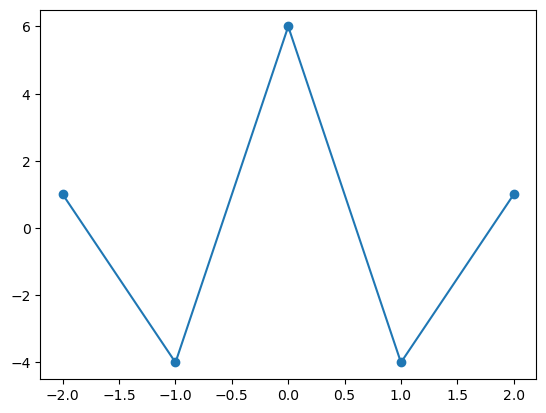

In [22]:
plt.plot(range(-2, 3), [1, -4, 6, -4, 1], '-o')

### 我们先用z变换法（母函数法）

$H$ 经过 $z-$变换为
$$ z^2-4z+6-4z^{-1}+z^{-2}=\dfrac{(1-z)^4}{z^2} $$
而 $\delta[i-j]$ 的 $z-$ 变换为 $z^{-j}$
所以原信号的 $z-$变换为